# Welcome to Jupyter!

In [171]:
def data_uploader():
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

    # Upload data from csv file
    # First read with header after creating col list add " header = None, "
    students_data = pd.read_csv("student-mat.csv")
    # it strange but csv file gives only one column so we need to split data of each row

    #creat columns name list and split one long string to 33 columns
    col = str(students_data.head(0)).split(';')

    # To delete trash data like 'Empty DataFrame\nColumns:'. Before I have found index of symbol for cutting columns[-1].rfind(']')

    col[0] = col[0][26:]
    col[-1] = col[-1][:2]

    #Split strang DF to list of separet rows
    rows_list = []
    for row in students_data.iterrows():
        rows_list.append(list(row[1].str.split(';')))

    #creat an empty DF with named columns
    df_students_data = pd.DataFrame(index=range(396), columns=col)

    #add data to each row
    for i in range(395):
        for j in range(33):
            df_students_data.loc[i][j] = rows_list[i][0][j]

    #Remove waste symbol
    df_students_data = df_students_data.replace({'"':''}, regex=True)
    return df_students_data

In [151]:
# Import charting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# Import data managment libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
## Imoprt function 
#from data_uploader_from_csv.ipynb import data_uploader

In [172]:
df = data_uploader() # corect long name - "df_students_data". I use short 'df' to make it faster

In [173]:
df = df.drop([395])

In [ ]:
drop_columns = ['address', ]

In [178]:
df['absences'] = df['absences'].apply(pd.to_numeric)
df['G3'] = df['G3'].apply(pd.to_numeric)
df['age'] = df['age'].apply(pd.to_numeric)

In [174]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [13]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


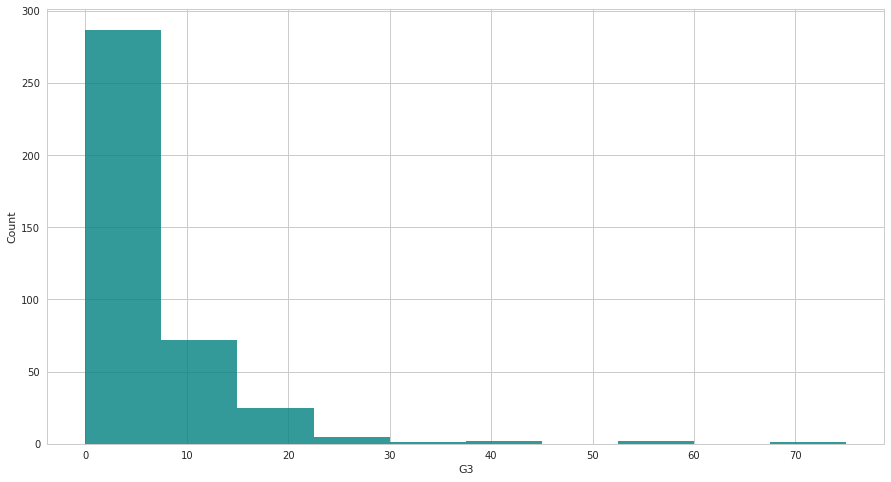

In [191]:
plt.figure(figsize=(15,8))
ax = df["absences"].hist(bins=10, color='teal', alpha=0.8)
ax.set(xlabel='G3', ylabel='Count')
plt.show()

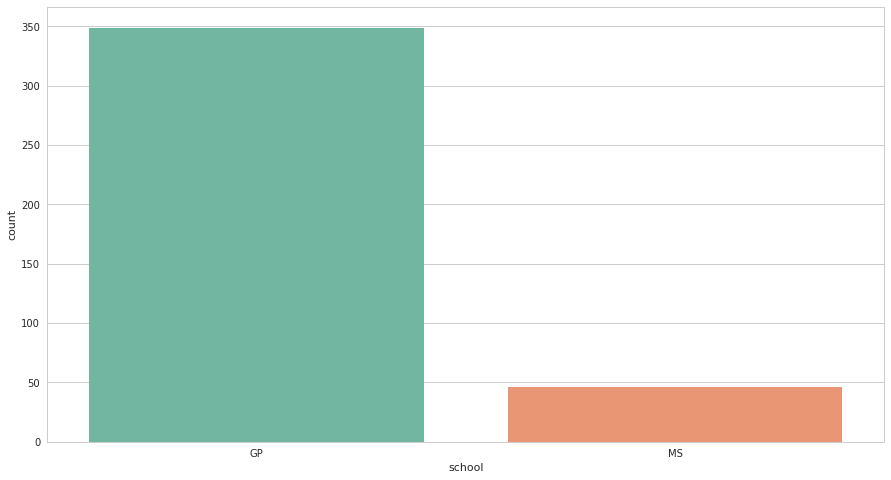

In [175]:
plt.figure(figsize=(15,8))
sns.countplot(x='school',data=df,palette='Set2')

plt.show()

In [104]:
df.describe()

,school,sex,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,internet,romantic,famrel,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
unique,2,2,9,5,5,5,5,4,3,4,...,2,2,5,5,5,5,34,17,17,18
top,GP,F,16,4,2,other,other,course,mother,1,...,yes,no,4,1,1,5,0,10,9,10
freq,349,208,104,131,115,141,217,145,273,257,...,329,263,195,276,151,146,115,51,50,56


In [103]:
df=df.drop(['famsize'], axis=1)

In [61]:
X=df.iloc[0]
Y=df['G3']

In [153]:
df['absences'] = df['absences'].apply(pd.to_numeric)
df['G3'] = df['G3'].apply(pd.to_numeric)
df['age'] = df['age'].apply(pd.to_numeric)

In [168]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [112]:
type(df)

pandas.core.frame.DataFrame

In [140]:
df['G3'].corr(df['absences'])

1.0

In [81]:
str('nan')

'nan'

In [154]:
print(df[['G3', 'age', 'sex', 'absences']].corr())

                G3       age  absences
G3        1.000000 -0.161579  0.034247
age      -0.161579  1.000000  0.175230
absences  0.034247  0.175230  1.000000


                G3       age  absences
G3        1.000000 -0.161579  0.034247
age      -0.161579  1.000000  0.175230
absences  0.034247  0.175230  1.000000


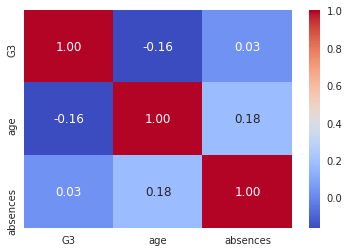

In [155]:
print(df[['G3', 'age', 'absences']].corr())
sns.heatmap(df[['G3', 'age', 'absences']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

In [156]:

import matplotlib.pyplot as plt
import numpy as np

def scatterplot(x_data, y_data, size, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = size, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

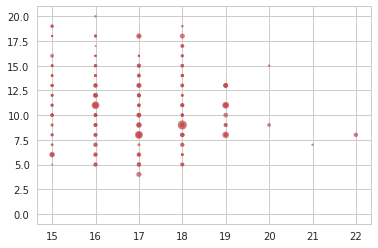

In [192]:
x_data = df['age']
y_data = df['G3']
s=df['absences']
scatterplot(x_data, y_data, s)

In [160]:
df[['age', 'G3', 'absences']]

,age,G3,absences
0,18.0,6.0,6.0
1,17.0,6.0,4.0
2,15.0,10.0,10.0
3,15.0,15.0,2.0
4,16.0,10.0,4.0
5,16.0,15.0,10.0
6,16.0,11.0,0.0
7,17.0,6.0,6.0
8,15.0,19.0,0.0
9,15.0,15.0,0.0
